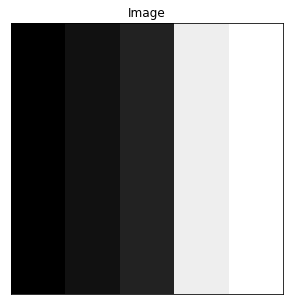

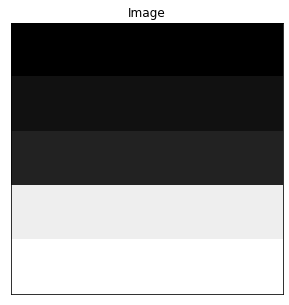

In [3]:
import matplotlib.pyplot as plt

from skimage import io

from scipy import signal
import numpy as np

%matplotlib inline

arrv = np.zeros((5, 5), dtype=np.float32)
arrh = np.zeros((5, 5), dtype=np.float32)

arrv[:, 0] = 10
arrv[:, 1] = 15
arrv[:, 2] = 20
arrv[:, 3] = 80
arrv[:, 4] = 85

arrh[0, :] = 10
arrh[1, :] = 15
arrh[2, :] = 20
arrh[3, :] = 80
arrh[4, :] = 85

def plot_image(arr):
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
  # print(arr)
  ax.imshow(arr, cmap=plt.cm.gray)
  ax.set_yticks([])
  ax.set_xticks([])
  ax.set_title('Image')

  plt.show()

plot_image(arrv)
plot_image(arrh)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]] 



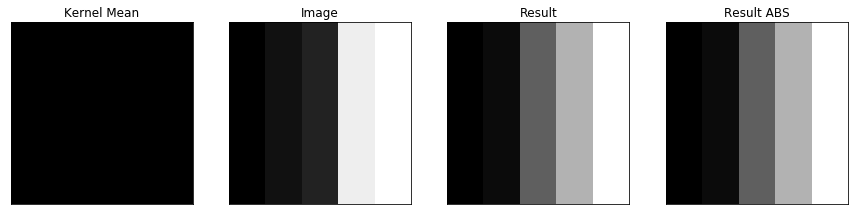

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]] 



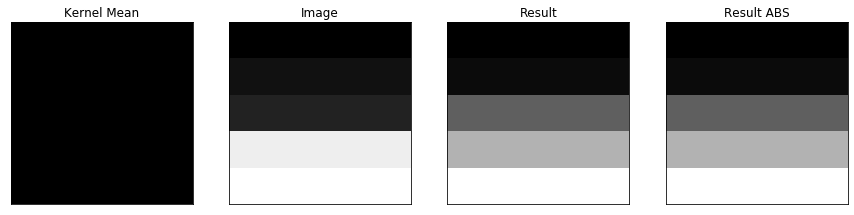

In [4]:
##### MEAN
# Mean -- reference https://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm
def mean_filter(arr):
  kernel_mean = np.zeros((3, 3), dtype=np.float32)
  kernel_mean[:] = 1.0/9.0
  result_mean = signal.convolve2d(arr, kernel_mean, 'same', boundary='symm')

  fig, ax = plt.subplots(1, 4, figsize=(15, 10))
  print(kernel_mean, '\n')
  ax[0].imshow(kernel_mean, cmap=plt.cm.gray)
  ax[0].set_yticks([])
  ax[0].set_xticks([])
  ax[0].set_title('Kernel Mean')

  ax[1].imshow(arr, cmap=plt.cm.gray)
  ax[1].set_yticks([])
  ax[1].set_xticks([])
  ax[1].set_title('Image')

  #print(result_mean)
  ax[2].imshow(result_mean, cmap=plt.cm.gray)
  ax[2].set_yticks([])
  ax[2].set_xticks([])
  ax[2].set_title('Result')

  #print(np.abs(result_mean))
  ax[3].imshow(np.abs(result_mean), cmap=plt.cm.gray)
  ax[3].set_yticks([])
  ax[3].set_xticks([])
  ax[3].set_title('Result ABS')

  plt.show()

mean_filter(arrv)
mean_filter(arrh)

[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]


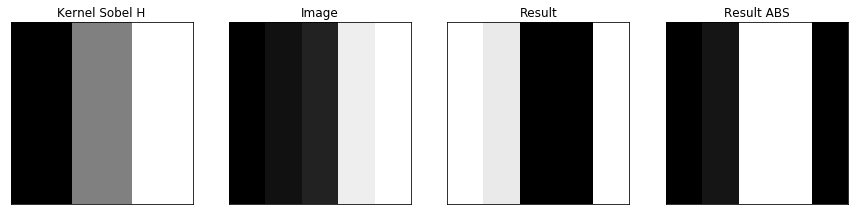

[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]


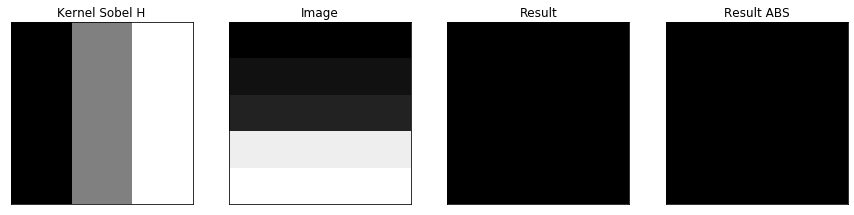

In [5]:
##### SOBEL HORIZONTAL
# Sobel horizontal -- reference: https://en.wikipedia.org/wiki/Sobel_operator
def sobelH(arr):
  kernel_h = np.zeros((3, 3), dtype=np.float32)
  kernel_h[:, 0] = -1
  kernel_h[:, 2] = 1

  result_h = signal.convolve2d(arr, kernel_h, 'same', boundary='symm')

  fig, ax = plt.subplots(1, 4, figsize=(15, 10))
  print(kernel_h)
  ax[0].imshow(kernel_h, cmap=plt.cm.gray)
  ax[0].set_yticks([])
  ax[0].set_xticks([])
  ax[0].set_title('Kernel Sobel H')

  ax[1].imshow(arr, cmap=plt.cm.gray)
  ax[1].set_yticks([])
  ax[1].set_xticks([])
  ax[1].set_title('Image')

  # print(result_h)
  ax[2].imshow(result_h, cmap=plt.cm.gray)
  ax[2].set_yticks([])
  ax[2].set_xticks([])
  ax[2].set_title('Result')

  #print(np.abs(result_h))
  ax[3].imshow(np.abs(result_h), cmap=plt.cm.gray)
  ax[3].set_yticks([])
  ax[3].set_xticks([])
  ax[3].set_title('Result ABS')

  plt.show()

sobelH(arrv)
sobelH(arrh)

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


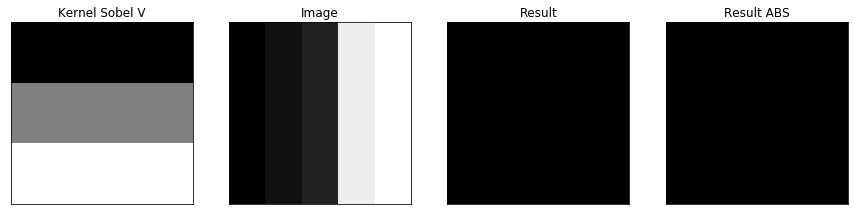

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


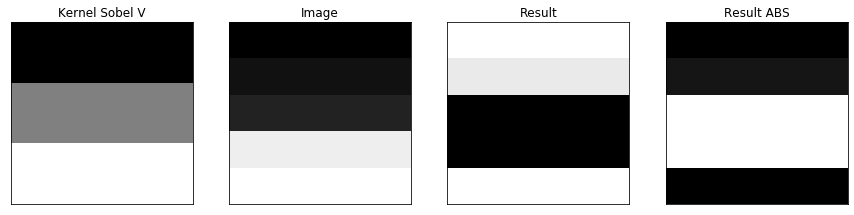

In [7]:
##### SOBEL VERTICAL
# Sobel vertical -- reference: https://en.wikipedia.org/wiki/Sobel_operator
def sobelV(arr):
  kernel_v = np.zeros((3, 3), dtype=np.float32)
  kernel_v[0, :] = -1
  kernel_v[2, :] = 1
  result_v = signal.convolve2d(arr, kernel_v, 'same', boundary='symm')

  fig, ax = plt.subplots(1, 4, figsize=(15, 10))
  print(kernel_v)
  ax[0].imshow(kernel_v, cmap=plt.cm.gray)
  ax[0].set_yticks([])
  ax[0].set_xticks([])
  ax[0].set_title('Kernel Sobel V')

  ax[1].imshow(arr, cmap=plt.cm.gray)
  ax[1].set_yticks([])
  ax[1].set_xticks([])
  ax[1].set_title('Image')

  #print(result_h)
  ax[2].imshow(result_v, cmap=plt.cm.gray)
  ax[2].set_yticks([])
  ax[2].set_xticks([])
  ax[2].set_title('Result')

  #print(np.abs(result_h))
  ax[3].imshow(np.abs(result_v), cmap=plt.cm.gray)
  ax[3].set_yticks([])
  ax[3].set_xticks([])
  ax[3].set_title('Result ABS')

  plt.show()

sobelV(arrv)
sobelV(arrh)

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


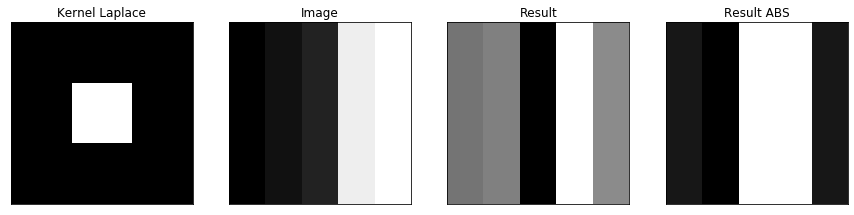

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


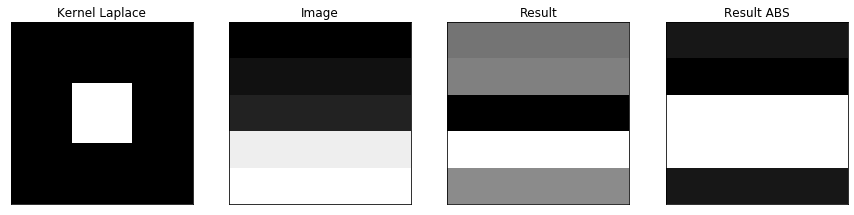

In [8]:
##### LAPLACE
# Laplace 3x3 -- reference: https://en.wikipedia.org/wiki/Discrete_Laplace_operator | https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm
def laplace(arr):
  kernel_laplace = np.ones((3, 3), dtype=np.float32) * -1
  kernel_laplace[1, 1] = 8
  result_laplace = signal.convolve2d(arr, kernel_laplace, 'same', boundary='symm')

  fig, ax = plt.subplots(1, 4, figsize=(15, 10))
  print(kernel_laplace)
  ax[0].imshow(kernel_laplace, cmap=plt.cm.gray)
  ax[0].set_yticks([])
  ax[0].set_xticks([])
  ax[0].set_title('Kernel Laplace')

  # print(arr)
  ax[1].imshow(arr, cmap=plt.cm.gray)
  ax[1].set_yticks([])
  ax[1].set_xticks([])
  ax[1].set_title('Image')

  # print(result_laplace)
  ax[2].imshow(result_laplace, cmap=plt.cm.gray)
  ax[2].set_yticks([])
  ax[2].set_xticks([])
  ax[2].set_title('Result')

  # print(np.abs(result_laplace))
  ax[3].imshow(np.abs(result_laplace), cmap=plt.cm.gray)
  ax[3].set_yticks([])
  ax[3].set_xticks([])
  ax[3].set_title('Result ABS')

  plt.show()

laplace(arrv)
laplace(arrh)

In [9]:
!wget https://www.dropbox.com/s/uvdtdydeuu9lb69/Lena-original-gray.png?dl=0
! mv Lena-original-gray.png?dl=0 lena.png

--2020-02-15 12:25:25--  https://www.dropbox.com/s/uvdtdydeuu9lb69/Lena-original-gray.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uvdtdydeuu9lb69/Lena-original-gray.png [following]
--2020-02-15 12:25:25--  https://www.dropbox.com/s/raw/uvdtdydeuu9lb69/Lena-original-gray.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5aacd51577f33a3b923b85009e.dl.dropboxusercontent.com/cd/0/inline/AyLoQrmup0n02fZkOzduiV9m5-OxZ2s64NZKKVte2N47fxVcNFtQS95lx1Ov9MdywW72zLVyoww1xS_U9kpsnDR1QK7VMj28pHSzAYC7oMbrbp8E7eO8Dk3XQ5MrQ6yPKrw/file# [following]
--2020-02-15 12:25:26--  https://uc5aacd51577f33a3b923b85009e.dl.dropboxusercontent.com/cd/0/inline/AyLoQrmup0n02fZkOzduiV9m5-OxZ2s64NZKKVte2N47fxVcNFtQS95lx1Ov9MdywW72zLVyoww1xS_

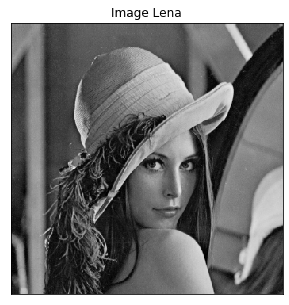

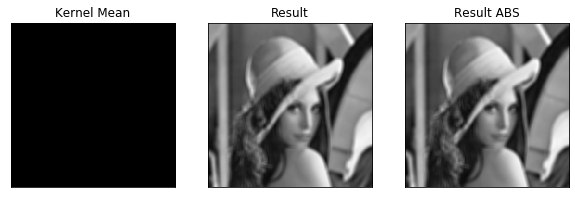

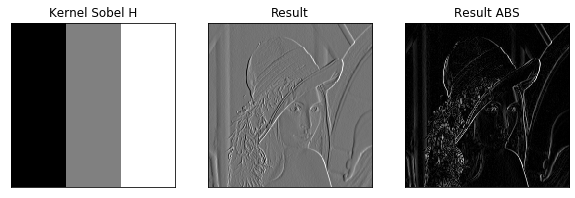

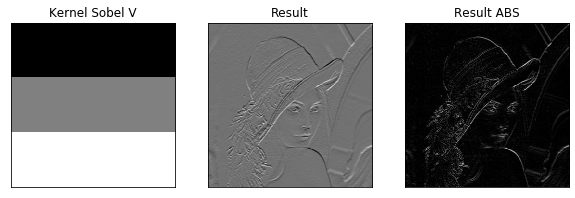

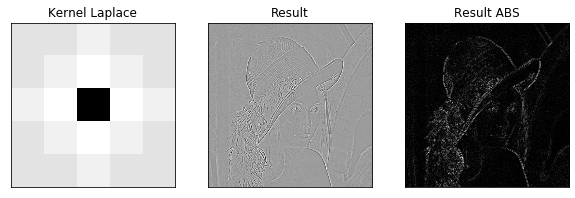

In [10]:
arr = io.imread('lena.png')[:,:,0]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# print(arr)
ax.imshow(arr, cmap=plt.cm.gray)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title('Image Lena')

plt.show()

##### MEAN
# Mean 9x9 -- reference https://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm
kernel_mean = np.zeros((9, 9), dtype=np.float32)
kernel_mean[:] = 1.0/(9**2)
result_mean = signal.convolve2d(arr, kernel_mean, 'same', boundary='symm')

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
#print(kernel_mean)
ax[0].imshow(kernel_mean, cmap=plt.cm.gray)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].set_title('Kernel Mean')

#print(result_mean)
ax[1].imshow(result_mean, cmap=plt.cm.gray)
ax[1].set_yticks([])
ax[1].set_xticks([])
ax[1].set_title('Result')

#print(np.abs(result_mean))
ax[2].imshow(np.abs(result_mean), cmap=plt.cm.gray)
ax[2].set_yticks([])
ax[2].set_xticks([])
ax[2].set_title('Result ABS')

plt.show()

##### SOBEL HORIZONTAL
# Sobel horizontal -- reference: https://en.wikipedia.org/wiki/Sobel_operator
kernel_h = np.zeros((3, 3), dtype=np.float32)
kernel_h[:, 0] = -1
kernel_h[:, 2] = 1
result_h = signal.convolve2d(arr, kernel_h, 'same', boundary='symm')

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
#print(kernel_h)
ax[0].imshow(kernel_h, cmap=plt.cm.gray)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].set_title('Kernel Sobel H')

#print(result_h)
ax[1].imshow(result_h, cmap=plt.cm.gray)
ax[1].set_yticks([])
ax[1].set_xticks([])
ax[1].set_title('Result')

#print(np.abs(result_h))
ax[2].imshow(np.abs(result_h), cmap=plt.cm.gray)
ax[2].set_yticks([])
ax[2].set_xticks([])
ax[2].set_title('Result ABS')

plt.show()

##### SOBEL VERTICAL
# Sobel vertical -- reference: https://en.wikipedia.org/wiki/Sobel_operator
kernel_v = np.zeros((3, 3), dtype=np.float32)
kernel_v[0, :] = -1
kernel_v[2, :] = 1
result_v = signal.convolve2d(arr, kernel_v, 'same', boundary='symm')

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
#print(kernel_h)
ax[0].imshow(kernel_v, cmap=plt.cm.gray)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].set_title('Kernel Sobel V')

#print(result_h)
ax[1].imshow(result_v, cmap=plt.cm.gray)
ax[1].set_yticks([])
ax[1].set_xticks([])
ax[1].set_title('Result')

#print(np.abs(result_h))
ax[2].imshow(np.abs(result_v), cmap=plt.cm.gray)
ax[2].set_yticks([])
ax[2].set_xticks([])
ax[2].set_title('Result ABS')

plt.show()

##### SOBEL VERTICAL
# Laplace 5x5 -- reference: https://en.wikipedia.org/wiki/Discrete_Laplace_operator | https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm
kernel_laplace = np.asarray([[0, 0,   1, 0, 0],
                            [0, 1,   2, 1, 0],
                            [1, 2, -16, 2, 1],
                            [0, 1,   2, 1, 0],
                            [0, 0,   1, 0, 0]], dtype=np.float) # Approximate 5x5 Laplacian.
result_laplace = signal.convolve2d(arr, kernel_laplace, 'same', boundary='symm')

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
#print(kernel_h)
ax[0].imshow(kernel_laplace, cmap=plt.cm.gray)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].set_title('Kernel Laplace')

#print(result_h)
ax[1].imshow(result_laplace, cmap=plt.cm.gray)
ax[1].set_yticks([])
ax[1].set_xticks([])
ax[1].set_title('Result')

#print(np.abs(result_h))
ax[2].imshow(np.abs(result_laplace), cmap=plt.cm.gray)
ax[2].set_yticks([])
ax[2].set_xticks([])
ax[2].set_title('Result ABS')

plt.show()